# Assignment 1 COMP3411

## Training the models

### Task 3: Classification Task

In [2]:
# Assignment 1 COMP3411 - Ashna Desai (z5366651)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import balanced_accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error

from scipy.stats import pearsonr

csv_file_path = 'Climate_SPI.csv'
df = pd.read_csv(csv_file_path)



ModuleNotFoundError: No module named 'tensorflow'

In [257]:
# Task a - Calculate 'Drought' from 'SPI' and add as a new column
df['Drought'] = (df['SPI'] <= -1).astype(int)


In [258]:
# Task b - Split data into training, validation and test sets

# input x
x = df[['mn2t', 'msl', 'mx2t', 'q', 't', 't2', 'tcc', 'u', 'u10', 'v', 'v10', 'z']]

# target y
y = df['Drought']

# data is split randomly (seed = 1)
x_train, x_rem, y_train, y_rem = train_test_split(x, y, test_size=0.8, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.5, random_state=1)


In [259]:
# Task c - Preprocessing the data

# Scale all input data
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_val = scaler.fit_transform(x_val)
x_scaled_test = scaler.fit_transform(x_test)



In [260]:
# Task d - Building the model

# using a sequential model
nnet = Sequential()

# input layer and hidden layer
nnet.add(Dense(units=32, input_dim=x.shape[1], activation='relu'))
nnet.add(Dropout(0.3))

# second hidden layer
nnet.add(Dense(units=64, activation='relu'))
nnet.add(Dropout(0.5))

# output layer
nnet.add(Dense(1, activation='sigmoid'))

# compile model with binary cross entropy loss and adam optimiser
optimizer = Adam(learning_rate=0.0005)
nnet.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [261]:
# Task e - Train the model

# 300 epochs and batch size 100
history = nnet.fit(x_scaled_train, y_train, epochs=300, batch_size=100, validation_data=(x_scaled_val, y_val))


Epoch 1/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6990 - loss: 0.5838 - val_accuracy: 0.8459 - val_loss: 0.4463
Epoch 2/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8533 - loss: 0.4407 - val_accuracy: 0.8459 - val_loss: 0.4271
Epoch 3/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.4329 - val_accuracy: 0.8459 - val_loss: 0.4181
Epoch 4/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8717 - loss: 0.3890 - val_accuracy: 0.8459 - val_loss: 0.4110
Epoch 5/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.4020 - val_accuracy: 0.8459 - val_loss: 0.4025
Epoch 6/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.3880 - val_accuracy: 0.8459 - val_loss: 0.3951
Epoch 7/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8705 - loss: 0.3861 - val_accuracy: 0.8459 - val_loss: 0.3898
Epoch 8/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8585 - loss: 0.3880 - val_accuracy: 0.8459 - v

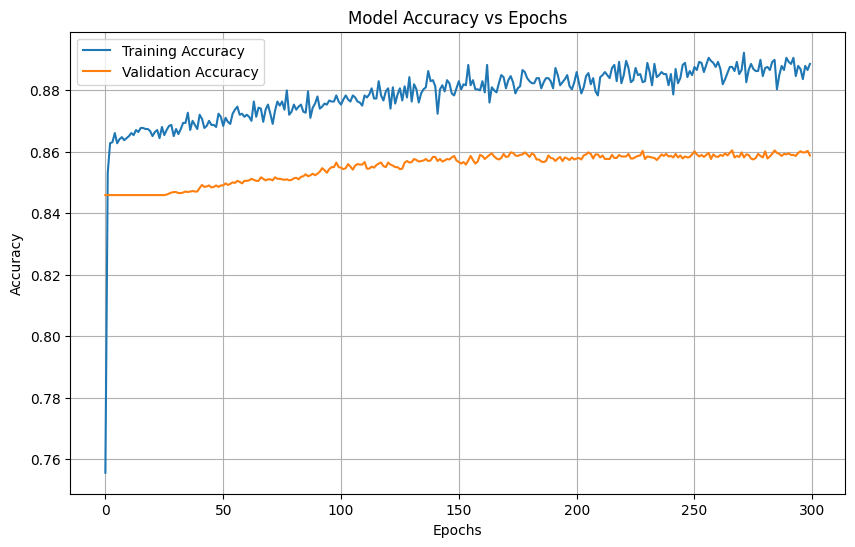

In [263]:
# Task f - Accuracy VS Epochs

# plot the graph of accuracy (training and validation) across accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [264]:
# Task j - using the model to predict the class

# predict class, and convert probabilities to binary (0 or 1)
y_pred_prob = nnet.predict(x_scaled_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int)



189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


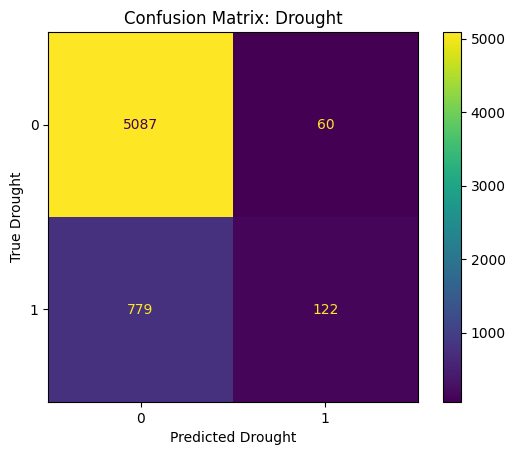

Balanced Accuracy: 0.5618739146776233
Precision: 0.6703296703296703


In [265]:
# Task k - Evaluate the performance of the model

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()

plt.xlabel('Predicted Drought')
plt.ylabel('True Drought')
plt.title('Confusion Matrix: Drought')
plt.show()

# find balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)

# find precision of class
precision = precision_score(y_test, y_pred_classes)

print(f'Balanced Accuracy: {balanced_acc}')
print(f'Precision: {precision}')

In [268]:
# save model
nnet.save('classification_model.keras')

### Task 4: Regression Task

In [269]:
# TASK 4 - Regression Task

# Task a - Split the data:

# input i
i = df[['mn2t', 'msl', 'mx2t', 'q', 't', 't2', 'tcc', 'u', 'u10', 'v', 'v10', 'z']]

# target t
t = df['SPI']

# data is split randomly (seed = 1)
i_train, i_rem, t_train, t_rem = train_test_split(i, t, test_size=0.8, random_state=1)
i_val, i_test, t_val, t_test = train_test_split(i_rem, t_rem, test_size=0.5, random_state=1)

In [270]:
# Task b - preprocessing data:

scaler = StandardScaler()
i_scaled_train = scaler.fit_transform(i_train)
i_scaled_val = scaler.fit_transform(i_val)
i_scaled_test = scaler.fit_transform(i_test)

In [271]:
# Task c - Building the model

nnet2 = Sequential()

nnet2.add(Dense(64, input_dim=i.shape[1], activation='relu'))

# output layer using tanh since values can be negative
nnet2.add(Dense(1, activation='tanh'))

# Compile the model with mean squared error loss and Adam optimizer
optimizer = Adam(learning_rate=0.0005)
nnet2.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error', 'mean_absolute_error'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [272]:
# Task d - Train the Model
# train model
history = nnet2.fit(i_scaled_train, t_train, epochs=300, batch_size=100, validation_data=(i_scaled_val, t_val))

Epoch 1/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1866 - mean_absolute_error: 0.8649 - mean_squared_error: 1.1866 - val_loss: 0.9221 - val_mean_absolute_error: 0.7614 - val_mean_squared_error: 0.9221
Epoch 2/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8790 - mean_absolute_error: 0.7381 - mean_squared_error: 0.8790 - val_loss: 0.7853 - val_mean_absolute_error: 0.7016 - val_mean_squared_error: 0.7853
Epoch 3/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7623 - mean_absolute_error: 0.6905 - mean_squared_error: 0.7623 - val_loss: 0.7185 - val_mean_absolute_error: 0.6709 - val_mean_squared_error: 0.7185
Epoch 4/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6622 - mean_absolute_error: 0.6389 - mean_squared_error: 0.6622 - val_loss: 0.6848 - val_mean_absolute_error: 0.6553 - val_mean_squared_error: 0.6848
Epoch 5/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6656 - mean_absolute_error: 0.6414 - mean_squared_error: 0.6656 - val_loss: 0.6628 - val_mean_a

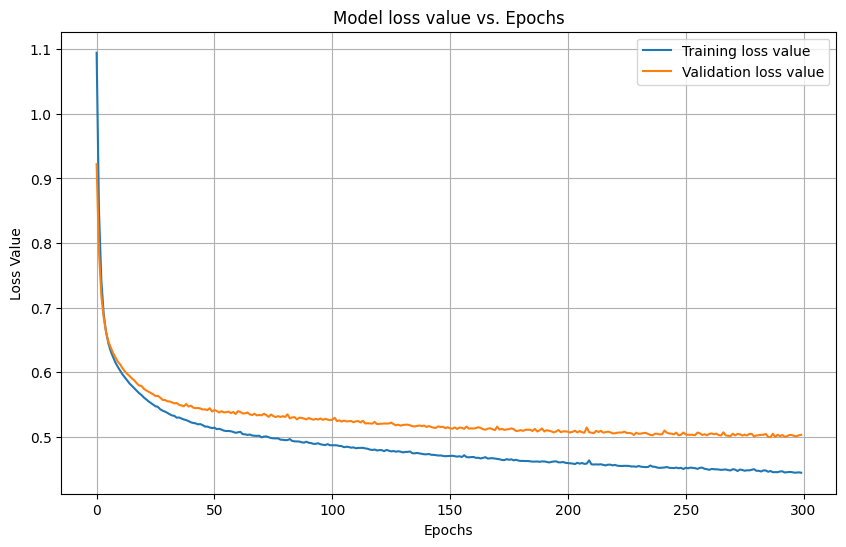

In [273]:
# Task e - Loss value VS Epochs

# plot the loss value for each epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss value')
plt.plot(history.history['val_loss'], label='Validation loss value')
plt.title('Model loss value vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.grid()
plt.show()

In [274]:
# Task i - Predict SPI on test set
t_pred_spi = 4 * nnet2.predict(i_scaled_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step


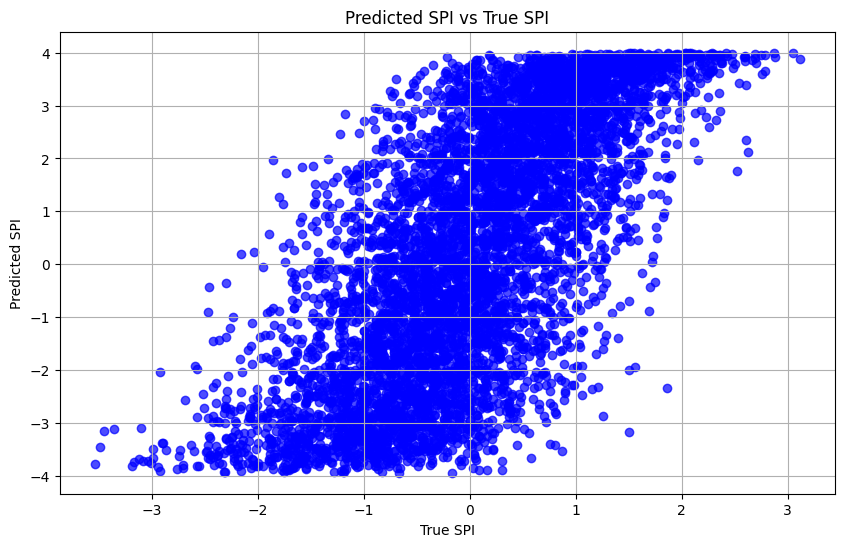

Mean Absolute Error: 1.5937411322989061
Pearson Correlation Coefficient: 0.706891621468823


In [275]:
# Task j - evaluate the data

plt.figure(figsize=(10, 6))
plt.scatter(t_test, t_pred_spi, alpha=0.7, color='blue')

plt.title('Predicted SPI vs True SPI')
plt.xlabel('True SPI')
plt.ylabel('Predicted SPI')
plt.grid(True)
plt.show()

mae = mean_absolute_error(t_test, t_pred_spi)

# calculate pearson correlation coefficient
t_test = np.array(t_test).flatten()
t_pred_spi = np.array(t_pred_spi).flatten()
pearson_corr, _ = pearsonr(t_test, t_pred_spi)

# print the results
print(f"Mean Absolute Error: {mae}")
print(f"Pearson Correlation Coefficient: {pearson_corr}")

In [276]:
# save model
nnet2.save('regression_model.keras')

### Task 5

In [1]:
# Task 5

from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

from scipy.stats import pearsonr

# Task a - load Climate SPI.csv
csv_file_path = 'Climate_SPI.csv'
df = pd.read_csv(csv_file_path)

ModuleNotFoundError: No module named 'tensorflow'

In [242]:
# Task b - Calculate 'Drought' from 'SPI' and add as a new column
df['Drought'] = (df['SPI'] <= -1).astype(int)

In [243]:
# Task c - Apply same transformations to new data set:

x5 = df[['mn2t', 'msl', 'mx2t', 'q', 't', 't2', 'tcc', 'u', 'u10', 'v', 'v10', 'z']]

# target y
y5 = df['Drought']

x_scaled = scaler.fit_transform(x5)


In [244]:
# Task d - load classification model

classification_model = load_model('classification_model.keras')

In [245]:
# Task e - Predict Drought class

y_pred_prob5 = classification_model.predict(x_scaled)
y_pred_classes5 = (y_pred_prob > 0.5).astype(int)

473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


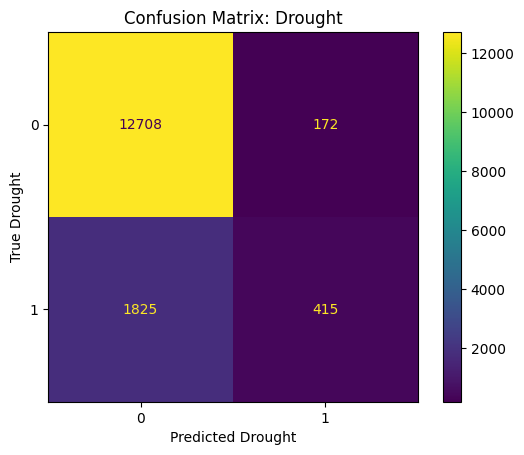

In [246]:
# Task f - Plot a confusion matrix

# confusion matrix
cm = confusion_matrix(y, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()

plt.xlabel('Predicted Drought')
plt.ylabel('True Drought')
plt.title('Confusion Matrix: Drought')
plt.show()

In [247]:
# Task f - Balanced accuracy and Precision

# find balanced accuracy
balanced_acc = balanced_accuracy_score(y, y_pred_classes5)

# find precision of class
precision = precision_score(y, y_pred_classes5)

print(f'Balanced Accuracy: {balanced_acc}')
print(f'Precision: {precision}')

Balanced Accuracy: 0.5859569099378882
Precision: 0.706984667802385


In [248]:
# Task h - Print the number of samples and predictors set

print(f'Number of samples: {len(x)}')
print(f"Predictors: {x.columns.to_list()}")
print(f'Number of predictors: {len(x.columns)}')

Number of samples: 15120
Predictors: ['mn2t', 'msl', 'mx2t', 'q', 't', 't2', 'tcc', 'u', 'u10', 'v', 'v10', 'z']
Number of predictors: 12


In [249]:
# Task a - load Climate SPI.csv
csv_file_path = 'Climate_SPI.csv'
df = pd.read_csv(csv_file_path)

In [250]:
# Task b - preprocessing
i5 = df[['mn2t', 'msl', 'mx2t', 'q', 't', 't2', 'tcc', 'u', 'u10', 'v', 'v10', 'z']]

# target t
t5 = df['SPI']

i_scaled = scaler.fit_transform(i5)


In [251]:
# Task c - Load regression model

regression_model = load_model('regression_model.keras')

In [252]:
# Task d - Predict SPI

t_pred_spi5 = 4 * nnet2.predict(i_scaled)

473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


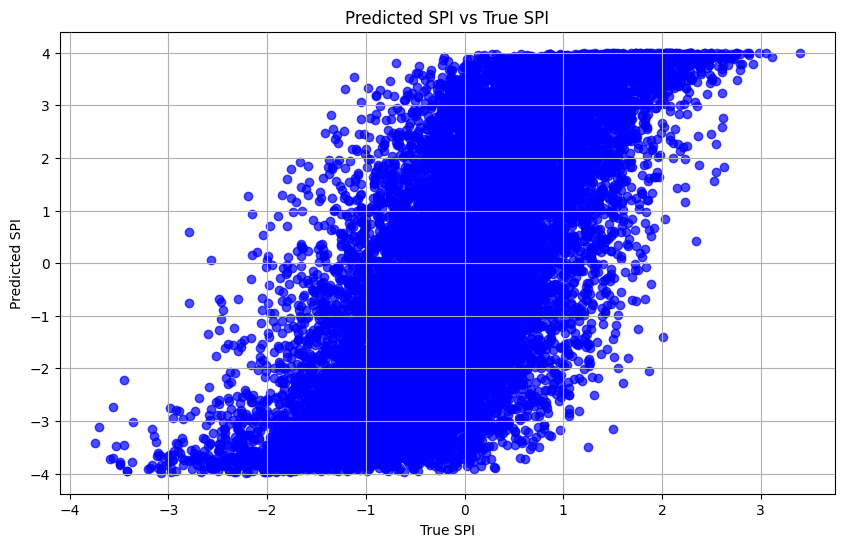

In [253]:
# Task e - Scatter Plot on predicted spi vs true spi

plt.figure(figsize=(10, 6))
plt.scatter(t5, t_pred_spi5, alpha=0.7, color='blue')

plt.title('Predicted SPI vs True SPI')
plt.xlabel('True SPI')
plt.ylabel('Predicted SPI')
plt.grid(True)
plt.show()


In [254]:
# Task f - Calculate MAE and PCC

mae = mean_absolute_error(t5, t_pred_spi5)

# calculate pearson correlation coefficient
t5 = np.array(t5).flatten()
t_pred_spi5 = np.array(t_pred_spi5).flatten()
pearson_corr, _ = pearsonr(t5, t_pred_spi5)

# print the results
print(f"Mean Absolute Error: {mae}")
print(f"Pearson Correlation Coefficient: {pearson_corr}")

Mean Absolute Error: 1.6064209410330978
Pearson Correlation Coefficient: 0.7079082581464693


In [255]:
# Task g - number of samples and predictors set
print(f'Number of samples: {len(i)}')
print(f"Predictors: {i.columns.to_list()}")
print(f'Number of predictors: {len(i.columns)}')

Number of samples: 15120
Predictors: ['mn2t', 'msl', 'mx2t', 'q', 't', 't2', 'tcc', 'u', 'u10', 'v', 'v10', 'z']
Number of predictors: 12
